# **SSCS - Test Playground**
Developed by André Paiva

## 01 - Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from urllib.request import urlopen
import shutil

## 02 - Auxiliar functions

In [2]:
zipname = "Datasets/SynthSalienceChoralSet_v1.zip"

In [3]:
def sscs_download():
    if(not os.path.exists(zipname)):
        url = "https://zenodo.org/record/6534429/files/SynthSalienceChoralSet_v1.zip?download=1"
        with urlopen(url) as response, open(zipname, 'wb') as out_file:
            shutil.copyfileobj(response, out_file)

In [4]:
def sscs_read_metadata():
    with zipfile.ZipFile(zipname) as zf:
        with zf.open('sscs_metadata.csv') as f:
            df = pd.read_csv(f)
            return df

In [5]:
def sscs_read_voice(name, voice):
    filename = 'sscs/' + name + "_"
    if(voice.upper() == 'S' or voice.upper() == 'A' or \
       voice.upper() == 'T' or voice.upper() == 'B'):
        filename = filename + voice.upper()
    elif(voice.lower() == 'mix'):
        filename = filename + voice.lower()
    else:
        raise NameError("Specify voice with 'S', 'A', 'T', 'B' or 'mix'.")
    filename = filename + ".csv"
    with zipfile.ZipFile(zipname) as zf:
        with zf.open(filename) as f:
            df = pd.read_csv(f)
    return df

In [6]:
def sscs_pick_random_song():
    df_metadata = sscs_read_metadata()
    rng = np.random.randint(0, df_metadata.shape[0])
    return df_metadata.get("Song name")[rng]

In [7]:
def sscs_read_all_voices(name):
    df_mix = sscs_read_voice(name, 'mix')
    df_s = sscs_read_voice(name, 'S')
    df_a = sscs_read_voice(name, 'A')
    df_t = sscs_read_voice(name, 'T')
    df_b = sscs_read_voice(name, 'B')
    return df_mix, df_s, df_a, df_t, df_b

In [8]:
def sscs_plot(dataframe):
  aspect_ratio = (3/8)*dataframe.shape[1]/dataframe.shape[0]
  fig, ax = plt.subplots(figsize=(13, 7))
  im = ax.imshow(dataframe, interpolation='nearest', aspect=aspect_ratio)
  plt.show()

## 03 - Download dataset SSCS

In [9]:
sscs_download()

## 04 - Pick random song and plot mix pitch saliences

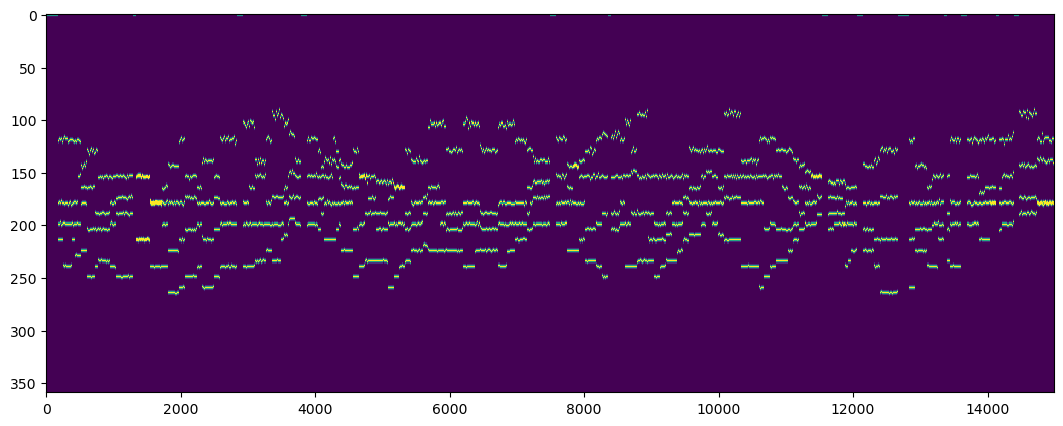

In [10]:

song = sscs_pick_random_song()
df_song_mix = sscs_read_voice(song, 'mix')
sscs_plot(df_song_mix)
del(df_song_mix)